## Pre-Processing time & Data analysis

Author : Ines Krissaane 

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
from random import sample 

## Import Data 

In [3]:
seta = pd.read_csv('sepsis_data_setA.csv')

In [4]:
setb = pd.read_csv('sepsis_data_setB.csv')

In [5]:
#number of patients with sepsis 
len(seta[seta['SepsisLabel']==1].ID.unique()) + len(setb[setb['SepsisLabel']==1].ID.unique())

2932

In [6]:
#whole dataset
X_tr = pd.read_csv('sepsis_data_all.csv')
X_tr.shape

(1552210, 44)

### Anomaly detection 

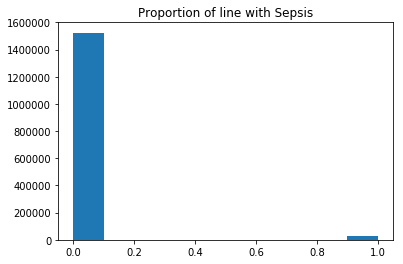

In [7]:
plt.hist(X_tr.SepsisLabel, )
plt.title('Proportion of line with Sepsis');

In [8]:
X_tr.SepsisLabel.value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

In [9]:
X_tr.SepsisLabel.value_counts(normalize=True)

0    0.982015
1    0.017985
Name: SepsisLabel, dtype: float64

### Missing values & Feature selection 

In [10]:
X_tr.columns

Index(['Unnamed: 0', 'X', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'ID'],
      dtype='object')

In [11]:
def na (data):
    return(data.isnull().sum().sort_values(ascending=False)/data.isnull().count()).sort_values(ascending=False)

na(X_tr)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit1               0.394251
Unit2               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

In [12]:
# separate patients with sepsis and without sepsis 
normal = X_tr[X_tr['SepsisLabel'] == 0]
anormal = X_tr[X_tr['SepsisLabel'] == 1]
list_anormal = list(anormal.ID.unique() )
list_normal = list(normal.ID.unique() )
df = X_tr
for i in (list_anormal):
    df = df[df.ID != i]

In [13]:
normal = df

We compare if missing values appear in same proportion in both group (and it's the case).

In [14]:
na(anormal)

Bilirubin_direct    0.995343
TroponinI           0.988537
Fibrinogen          0.988179
Bilirubin_total     0.971163
Alkalinephos        0.967760
AST                 0.967617
PTT                 0.956154
Phosphate           0.941073
HCO3                0.938172
SaO2                0.935127
Chloride            0.931509
Lactate             0.929754
Platelets           0.924810
Creatinine          0.922553
WBC                 0.916714
Magnesium           0.914243
Calcium             0.913885
BUN                 0.909443
Hgb                 0.903819
BaseExcess          0.897693
EtCO2               0.892642
Hct                 0.887770
PaCO2               0.886982
Potassium           0.868140
pH                  0.866385
FiO2                0.820175
Glucose             0.817631
Temp                0.660553
Unit2               0.450745
Unit1               0.450745
DBP                 0.298861
SBP                 0.151956
Resp                0.143430
O2Sat               0.103597
MAP           

In [15]:
na(normal)

Bilirubin_direct    0.998210
Fibrinogen          0.993859
TroponinI           0.990246
Bilirubin_total     0.985754
Alkalinephos        0.984819
AST                 0.984648
Lactate             0.976494
EtCO2               0.971762
PTT                 0.971274
SaO2                0.966833
Phosphate           0.961409
HCO3                0.959363
Chloride            0.956217
BaseExcess          0.949047
PaCO2               0.948147
Calcium             0.943293
Platelets           0.941210
Creatinine          0.939877
Magnesium           0.938757
WBC                 0.936937
pH                  0.934891
BUN                 0.932695
Hgb                 0.927035
FiO2                0.925882
Hct                 0.912060
Potassium           0.909336
Glucose             0.831086
Temp                0.663334
Unit2               0.383287
Unit1               0.383287
DBP                 0.323349
Resp                0.155525
SBP                 0.145871
O2Sat               0.134836
MAP           

#### Clinician expertise 


##### Important features :
   - HR
   - Temp
   - SBP
   - MAP 
   - DBP 
   - Resp
   - Creatinine 
   - Bilirubin_direct
   - Glucose 
   - Lactate 
   

In [16]:
# Remove variables with more than 82% of na.
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' ,'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Unnamed: 0','Fibrinogen', 'Platelets',
    "Glucose"], axis = 1, inplace = True)

In [17]:
print(X_tr.columns.values)

['X' 'HR' 'O2Sat' 'Temp' 'SBP' 'MAP' 'DBP' 'Resp' 'Age' 'Gender' 'Unit1'
 'Unit2' 'HospAdmTime' 'ICULOS' 'SepsisLabel' 'ID']


## Some plots 

No handles with labels found to put in legend.


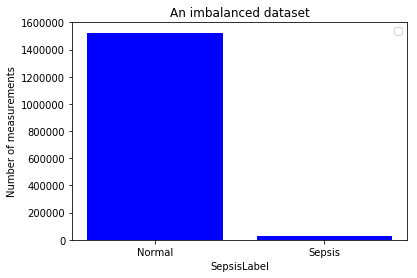

In [18]:
plt.bar([0,1],[1524294,27916], label="", color='b')
plt.legend()
plt.xlabel('SepsisLabel')
plt.ylabel('Number of measurements')

plt.xticks([0,1], ['Normal','Sepsis'])


plt.title('An imbalanced dataset')

plt.savefig('imbalanced_dataset.png')

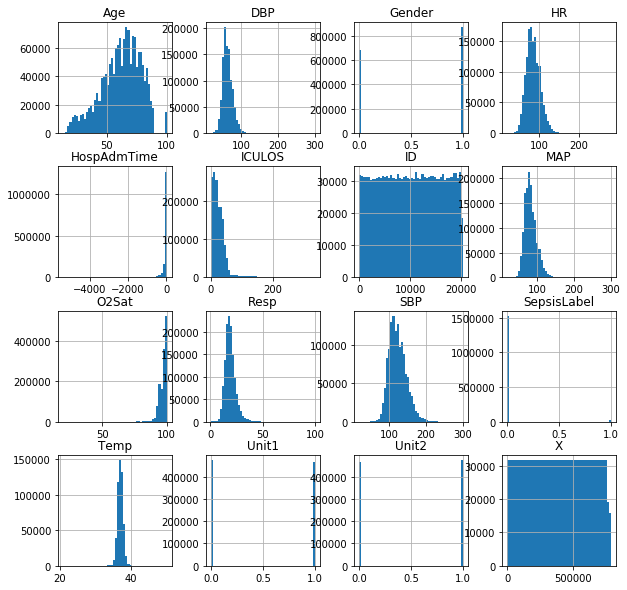

In [19]:
X_tr.hist(figsize=(10, 10), bins=50);

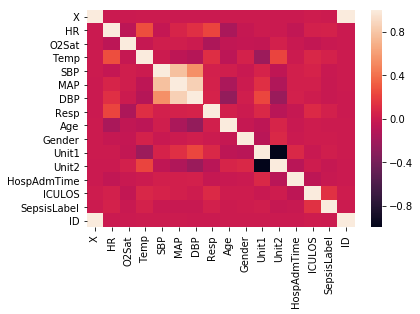

In [20]:
corr = X_tr.corr()
sns.heatmap(corr);

Unit 1 and Unit 2 are equally proportionnal and no correlation with SepsisLabel. 

In [21]:
X_tr.drop(['Unit1', "Unit2"], axis = 1, inplace = True)

In [22]:
X_tr.drop(['X'], axis = 1, inplace = True)

Considering the formula MAP = (SBP + 2*DBP) / 3 and the correlation between MAP and DBP, SBP.
Let's remove SBP and DBP.

In [23]:
X_tr.drop(["DBP", "SBP"], axis = 1, inplace = True)

In [24]:
na(X_tr)

Temp           0.661627
Resp           0.153546
O2Sat          0.130611
MAP            0.124513
HR             0.098826
HospAdmTime    0.000005
SepsisLabel    0.000000
ID             0.000000
ICULOS         0.000000
Gender         0.000000
Age            0.000000
dtype: float64

In [25]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [26]:
def curve(data, var, n):
    '''Plot data from n patients who have sepsis at the time indicated by the red line for a specific variable var
    var = string for the feature
    n = square number for the total number of plots '''
    
    list_anormal = list(anormal.ID.unique() )
    fig, subplot_axes = plt.subplots(int(np.sqrt(n)),int(np.sqrt(n)), squeeze=False, figsize=(16,12))

    for it, p in enumerate(list(sample(list_anormal, n))) :
        onedf = data[data['ID'] == p]
        onedf.index = onedf.ICULOS
        ax = subplot_axes[it // int(np.sqrt(n))][it % int(np.sqrt(n))]
        ax.plot(data[data['ID'] == p].ICULOS,data[data['ID'] == p][var])
        ax.set_title('Patient number  %i' % p)
        ax.axvline(x=np.argmax(onedf['SepsisLabel']), color='red')
        ax.axvline(x=np.argmax(onedf['SepsisLabel'])+6, color='green');

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
    plt.show()
    return 

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


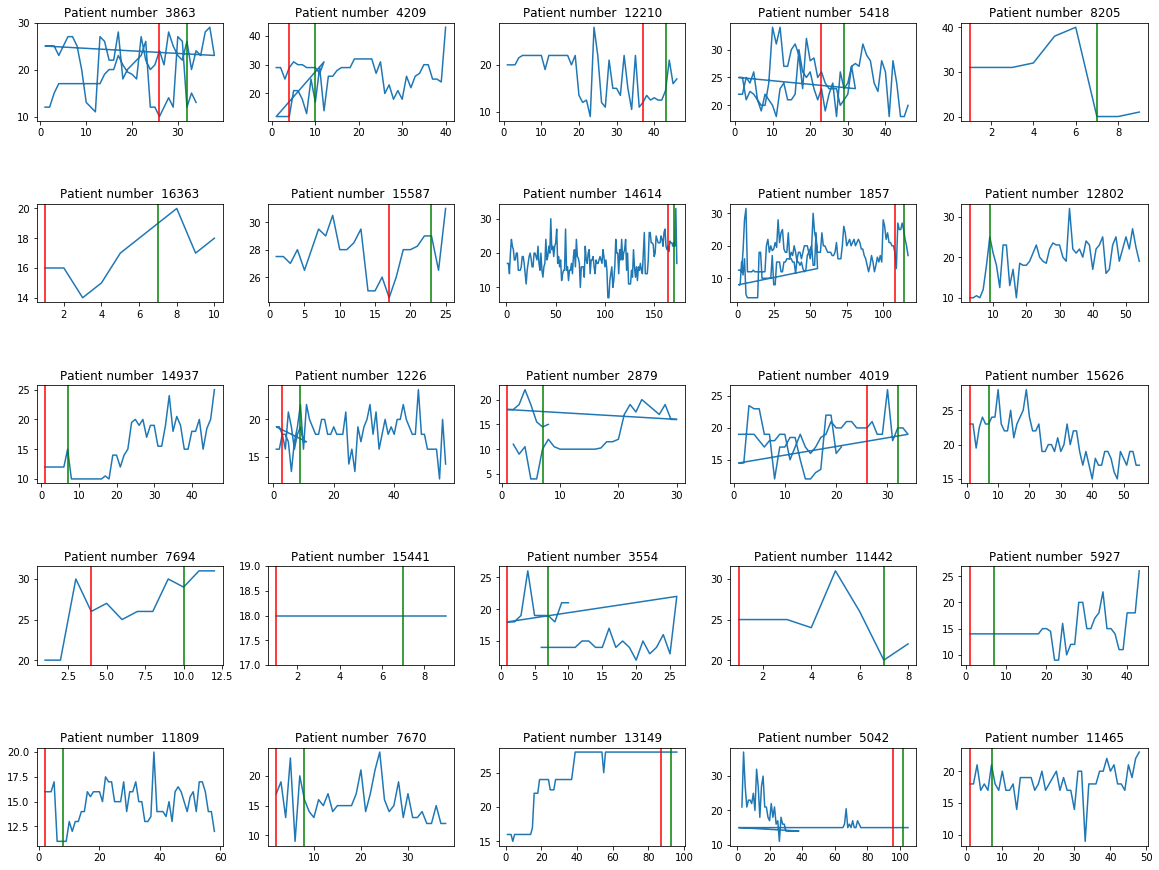

In [27]:
data = X_tr.iloc[1:1000000,]
curve(data, 'Resp', 25)

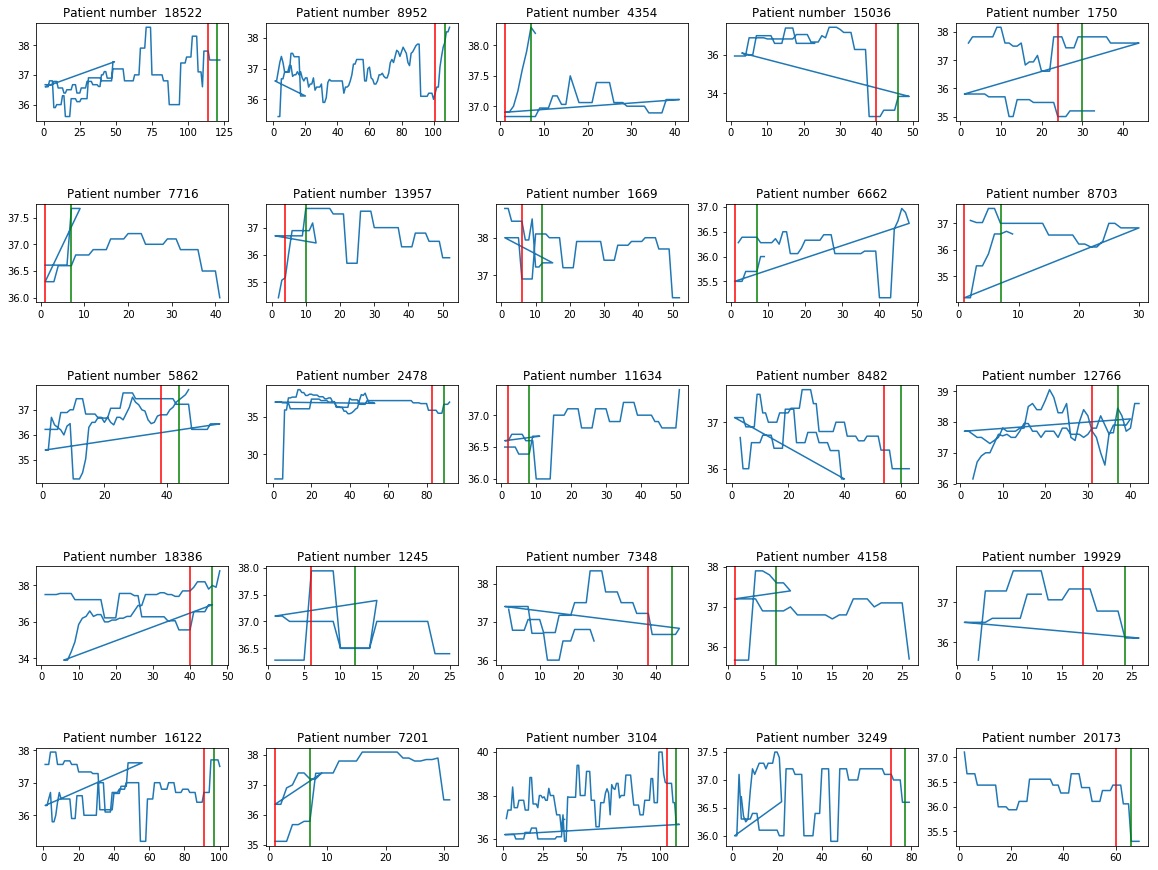

In [28]:
curve(X_tr,'Temp', 25)

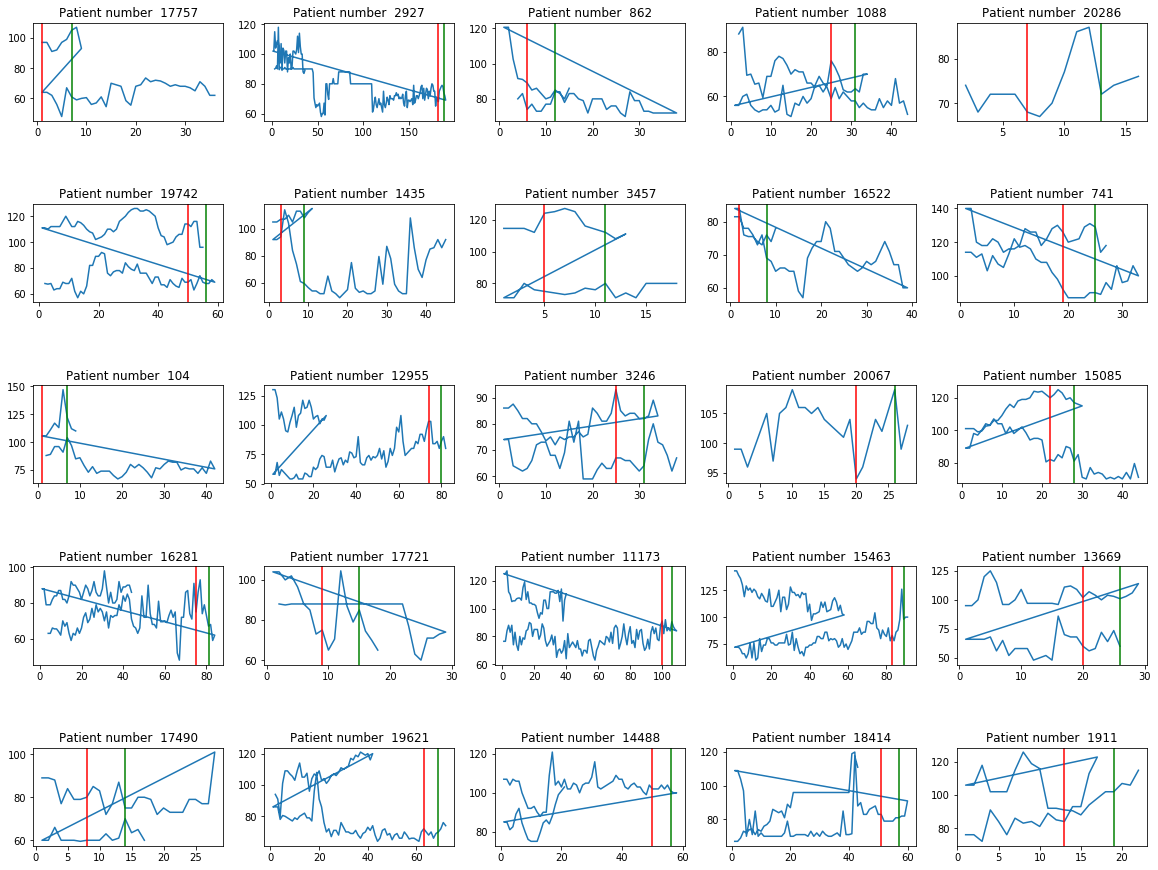

In [29]:
curve(X_tr,'HR', 25)

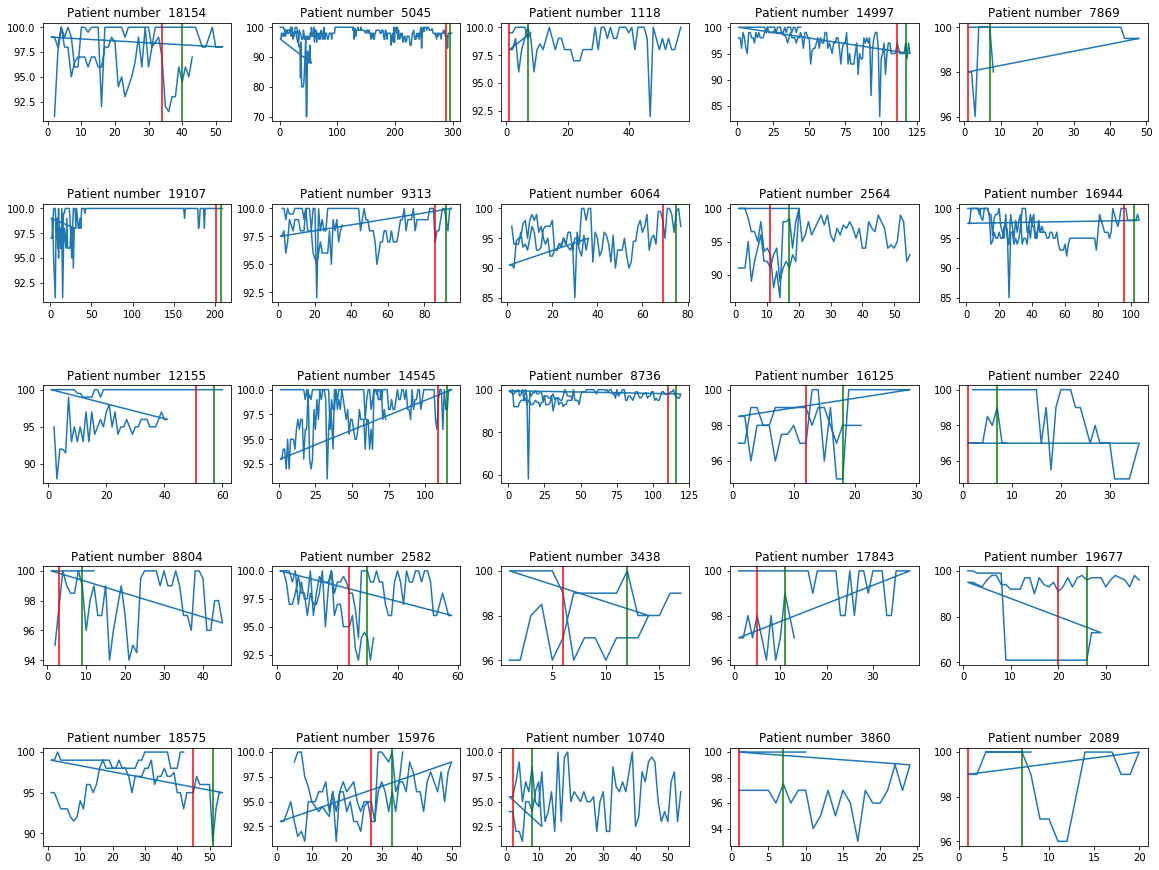

In [30]:
curve(X_tr,'O2Sat', 25)

In [31]:
def fun(var):
    '''Compare both groups for a specific variable '''
    
    tab = X_tr[X_tr[var] > 0]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(14,10))
    ax1.hist(tab[tab.SepsisLabel == 1][var]);
    ax2.hist(tab[tab.SepsisLabel == 0][var]);

    m1, m2 = sum(tab[tab.SepsisLabel == 1][var])/len(tab[tab.SepsisLabel == 1][var]), sum(tab[tab.SepsisLabel == 0][var])/len(tab[tab.SepsisLabel == 0][var])
    plt.show()
    return  {'Anormal patients ': m1, 'Normal patients ': m2}

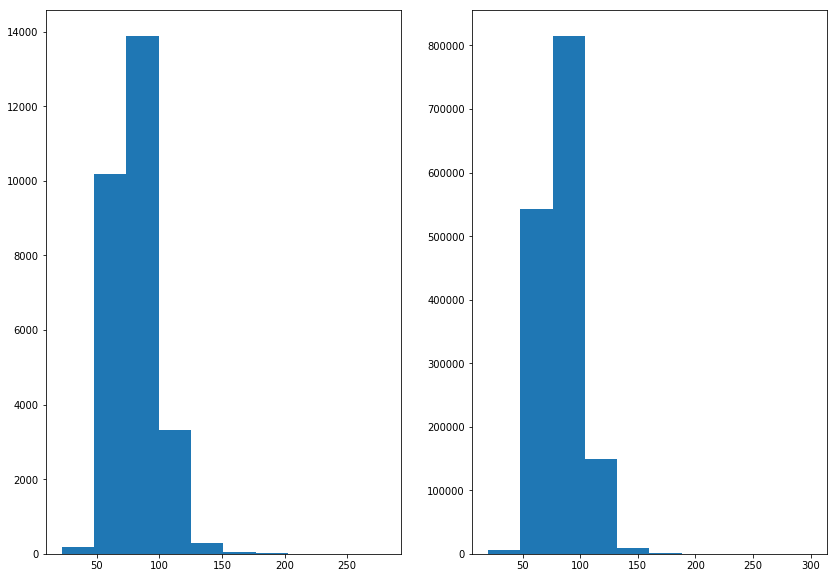

{'Anormal patients ': 80.55206225820308, 'Normal patients ': 82.83938230420202}

In [32]:
fun('MAP')

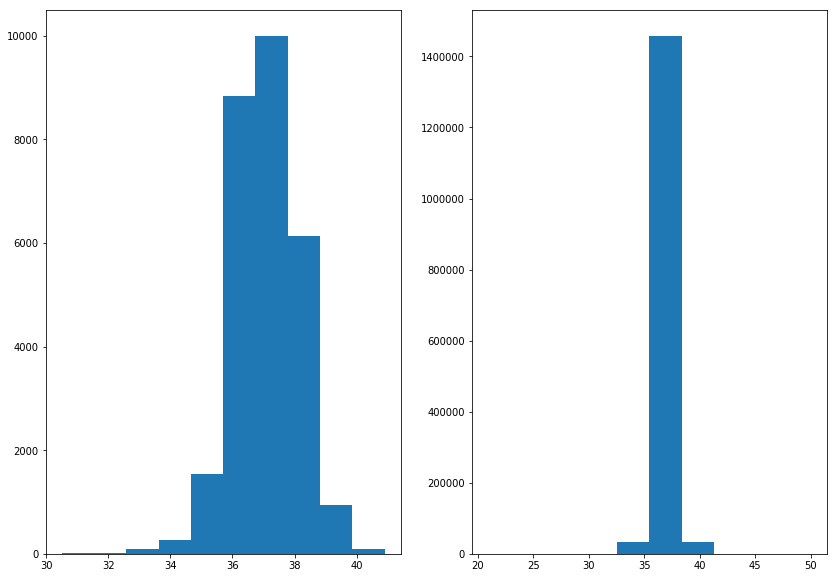

{'Anormal patients ': 37.07771027367756, 'Normal patients ': 36.84667206590653}

In [33]:
fun('Temp')

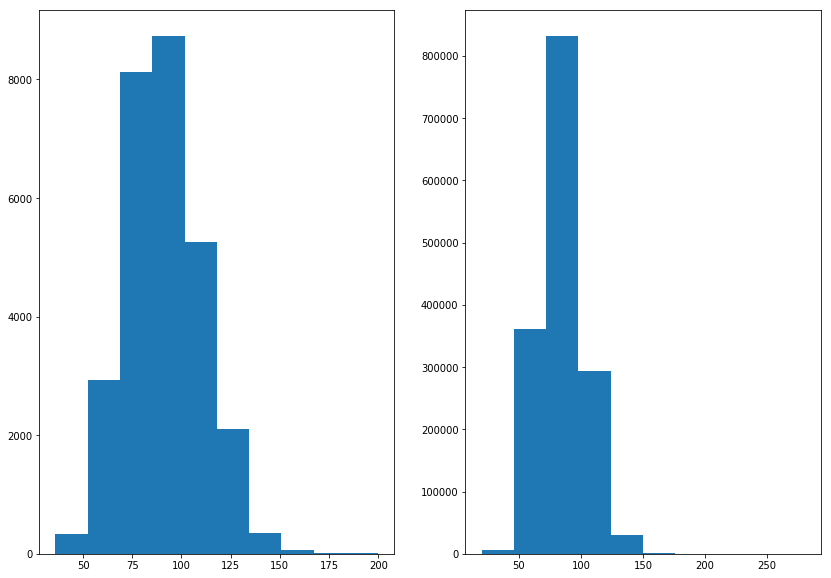

{'Anormal patients ': 90.91876522424415, 'Normal patients ': 84.33280991068652}

In [34]:
fun('HR')

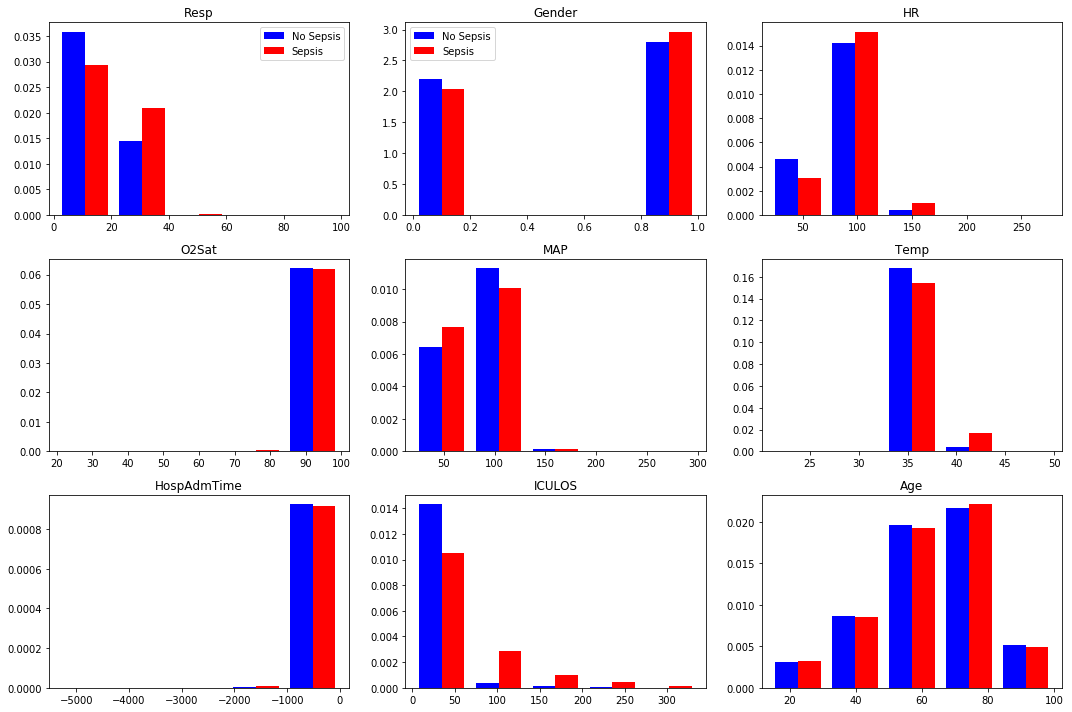

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

colors = ['blue', 'red']
ax0.hist([X_tr[X_tr.SepsisLabel == 0].Resp,X_tr[X_tr.SepsisLabel == 1].Resp], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax0.set_title('Resp')
ax0.legend(prop={'size': 10})

ax1.hist([X_tr[X_tr.SepsisLabel == 0].Gender,X_tr[X_tr.SepsisLabel == 1].Gender], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax1.set_title('Gender')
ax1.legend(prop={'size': 10})

ax2.hist([X_tr[X_tr.SepsisLabel == 0].HR,X_tr[X_tr.SepsisLabel == 1].HR], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax2.set_title('HR')

ax3.hist([X_tr[X_tr.SepsisLabel == 0].O2Sat,X_tr[X_tr.SepsisLabel == 1].O2Sat], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax3.set_title('O2Sat')

ax4.hist([X_tr[X_tr.SepsisLabel == 0].MAP,X_tr[X_tr.SepsisLabel == 1].MAP], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax4.set_title('MAP')

ax5.hist([X_tr[X_tr.SepsisLabel == 0].Temp,X_tr[X_tr.SepsisLabel == 1].Temp], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax5.set_title('Temp')


ax6.hist([X_tr[X_tr.SepsisLabel == 0].HospAdmTime,X_tr[X_tr.SepsisLabel == 1].HospAdmTime], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax6.set_title('HospAdmTime')


ax7.hist([X_tr[X_tr.SepsisLabel == 0].ICULOS,X_tr[X_tr.SepsisLabel == 1].ICULOS], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax7.set_title('ICULOS')

ax8.hist([X_tr[X_tr.SepsisLabel == 0].Age,X_tr[X_tr.SepsisLabel == 1].Age], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax8.set_title('Age')

fig.tight_layout()
plt.show()

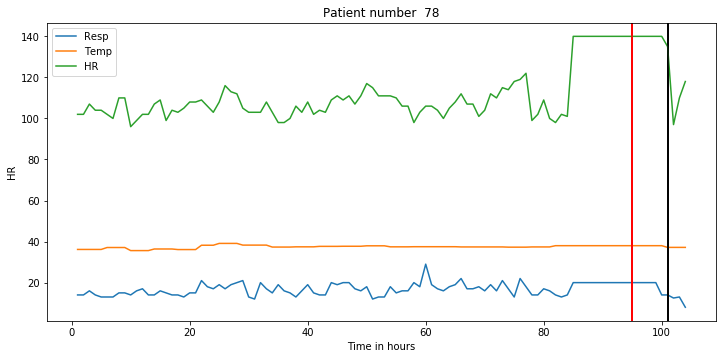

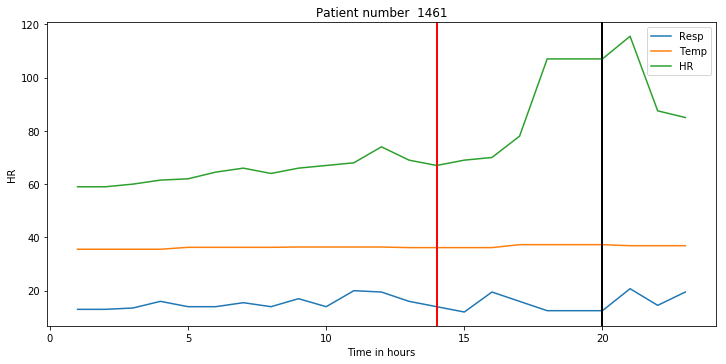

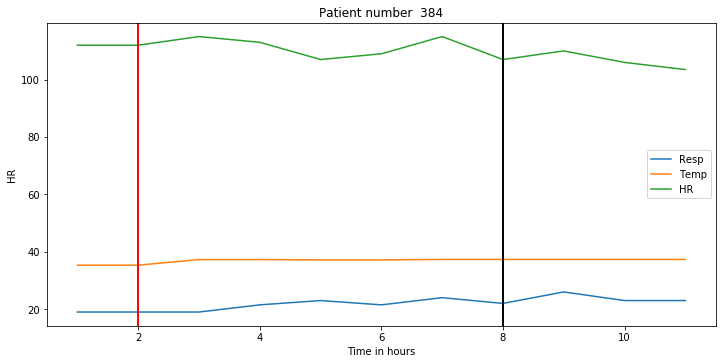

In [36]:
pat = [78,1461,384]
#anormal.ID.unique()[20:30]
data = X_tr


for it, p in enumerate(pat) :
            data = data.iloc[1:100000,]
            onedf = data[data['ID'] == p]
            onedf.index = onedf.ICULOS
            plt.figure(figsize=(10, 15))
            plt.subplot(3, 1, it+1)

            for var in (['Resp','Temp','HR']) :
                plt.plot(data[data['ID'] == p].ICULOS,data[data['ID'] == p][var], label=  '%s' % var)
                plt.ylabel('%s' % var)
                plt.xlabel('Time in hours')
                plt.axvline(x=np.argmax(onedf['SepsisLabel']), color='red')
                plt.axvline(x=np.argmax(onedf['SepsisLabel'])+6, color='black');
                plt.title('Patient number  %i' % p)
                plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
                plt.legend()
                #plt.show()

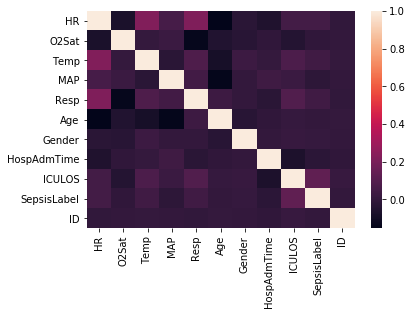

In [37]:
corr = X_tr.corr()
sns.heatmap(corr);

In [38]:
X_tr.drop(["HospAdmTime", 'ID'], axis = 1, inplace = True)

In [39]:
X_tr.drop(["O2Sat"], axis = 1, inplace = True)

In [41]:
# final selected features
X_tr.head()

,HR,Temp,MAP,Resp,Age,Gender,ICULOS,SepsisLabel
0,97.0,36.11,75.33,19.0,83.14,0,1,0
1,97.0,36.11,75.33,19.0,83.14,0,2,0
2,89.0,36.11,86.00,22.0,83.14,0,3,0
3,90.0,36.11,91.33,30.0,83.14,0,4,0
4,103.0,36.11,91.33,24.5,83.14,0,5,0
